# Kernel Function

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/AI4Chem/blob/main/website/modules/02-kernel_function.ipynb)

**References:**
1. **Chapters 6**: [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/wp-content/uploads/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), C. M. Bishop.
2. **Chapter 2**:  [Gaussian Processes for Machine LearningOpen Access](https://direct.mit.edu/books/oa-monograph-pdf/2514321/book_9780262256834.pdf), C. E. Rasmussen, C. K. I. Williams
3. **Chapter 4**: [Machine Learning in Quantum Sciences](https://arxiv.org/pdf/2204.04198)
4. [**The Kernel Cookbook**](https://www.cs.toronto.edu/~duvenaud/cookbook/)

# Introduction

So far we have covered regression models of the form, 
$$
f(\mathbf{\phi}(\mathbf{x}),\mathbf{w}) = \mathbf{w}^\top \mathbf{\phi}(\mathbf{x})= \sum_{i}^d w_i \, \phi_i(\mathbf{x}),
$$
where the set of non-linear transformations $\phi_i$ when chosen properly can be powerful regression models.
The change from 
$$
\mathbf{x} = \underbrace{\begin{bmatrix}
 x_1 \\
 \vdots \\
x_d
\end{bmatrix}}_{\text{input space}} \;\;  \to \;\; \mathbf{\phi}(\mathbf{x}) = \underbrace{\begin{bmatrix}
\phi_1(\mathbf{x}) \\
 \vdots \\
\phi_{d'}(\mathbf{x})
\end{bmatrix}}_{\text{feature space}}
$$
is also know as **feature transformation**. For example, polynomial expansion. <br>


<!-- There is another class of models, where prediction is done through a linear combination of a **kernel function** evaluated on at the training data points.  -->

* We can construct another alternative approach to build a regression model using the **distance** or **similarity** between training data points; known as the **kernel** function. 
* The kernel function allows us to *implicitly* use a "high-dimensional" feature space; e.g., infinite polynomial expansion. 


# Kernel trick
Here, we present a~derivation of the kernel trick following [Appendix B in Machine Learning in Quantum Sciences](https://arxiv.org/pdf/2204.04198).

1. Let's define the ridge regression loss function
$$
\begin{equation}
    {\mathcal L}(\mathbf{w},\mathbf{X},\mathbf{y}) = \left\| \mathbf{X}\mathbf{w} - \mathbf{y} \right\|_2^2  + \lambda \left\| \mathbf{w} \right\|_2^2,
\end{equation}
$$
where, 
$$
\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^\top \\
\mathbf{x}_2^\top \\
\vdots \\
 \mathbf{x}_{N}^\top \\
\end{bmatrix} = \begin{bmatrix}
x_{1,1} & x_{1,2} &\cdots & x_{1,d}\\
x_{2,1} & x_{2,2}&\cdots & x_{2,d}\\
\vdots & \vdots &\ddots & \vdots\\
x_{N,1} & x_{N,2}&\cdots & x_{N,d}\\
\end{bmatrix} \text{ and  } \mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{N}
\end{bmatrix},
$$

The optimal set of parameters $\mathbf{w}^*$ is found by minimizing ${\mathcal L}(\mathbf{w},\mathbf{X},\mathbf{y})$ with respect to $\mathbf{w}$, 
$$
    \mathbf{w}^* = \arg \min_{\mathbf{w}} {\mathcal L}(\mathbf{w},\mathbf{X},\mathbf{y}) = \arg \min_{\mathbf{w}} \left\| \mathbf{X}\mathbf{w} - \mathbf{y} \right\|_2^2  + \lambda \left\| \mathbf{w} \right\|_2^2.
$$

2. Find the value of $\mathbf{w}$ where  $\nabla_{\mathbf{w}}{\mathcal L} = \mathbf{0}$. Following the same procedure from the least square problem we find that, 
$$
\mathbf{w}^* = \left ( \mathbf{X}^\top\mathbf{X} + \lambda I\right )^{-1}  \mathbf{X}^\top\mathbf{y}.
$$

Before we proceed further, let us examine the $\mathbf{X}^\top\mathbf{X}$ term
$$
\mathbf{X}^\top\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N \\
\end{bmatrix} \begin{bmatrix}\mathbf{x}_1^\top \\\mathbf{x}_2^\top \\\vdots \\ \mathbf{x}_N^\top \\
\end{bmatrix} = \begin{bmatrix}
x_{1,1} &  \cdots  & x_{N,1} \\
x_{1,2} &  \cdots  & x_{N,2}  \\
\vdots & \ddots  & \vdots \\
x_{1,d} & \cdots  & x_{N,d}  \\
\end{bmatrix}\begin{bmatrix}x_{1,1} & \cdots & x_{1,d}\\x_{2,1} & \cdots & x_{2,d}\\\vdots & \ddots & \vdots\\x_{N,1} & \cdots & x_{N,d}\\\end{bmatrix}.
$$

4. Use the following identity matrix,
$$
\left ( \mathbf{A}\mathbf{B} +  I\right )^{-1} \mathbf{A} = \mathbf{A}\left ( \mathbf{B}\mathbf{A} +  I\right )^{-1}.
$$

5. Optimal parameters
$$
\mathbf{w}^* =  \mathbf{X}^\top\left ( \mathbf{X}\mathbf{X}^\top + \lambda I\right )^{-1} \mathbf{y}.
$$
Let's look closer to $\mathbf{X}\mathbf{X}^\top$
$$
\mathbf{X}\mathbf{X}^\top = \begin{bmatrix}x_{1,1} & \cdots & x_{1,d}\\x_{2,1} & \cdots & x_{2,d}\\\vdots & \ddots & \vdots\\x_{N,1} & \cdots & x_{N,d}\\\end{bmatrix} \begin{bmatrix}
x_{1,1} & \cdots  & x_{N,1} \\
x_{1,2} & \cdots  & x_{N,2}  \\
\vdots & \ddots  & \vdots \\
x_{1,d} & \cdots  & x_{N,d}  \\
\end{bmatrix} = \begin{bmatrix} \mathbf{x}_1^\top \mathbf{x}_1 & \mathbf{x}_1^\top \mathbf{x}_2 & \cdots &\mathbf{x}_1^\top \mathbf{x}_N \\
\mathbf{x}_2^\top \mathbf{x}_1 & \mathbf{x}_2^\top \mathbf{x}_2 & \cdots & \mathbf{x}_2^\top \mathbf{x}_N \\
\vdots &  & \ddots & \vdots \\
\mathbf{x}_N^\top \mathbf{x}_1 & \mathbf{x}_N^\top \mathbf{x}_2 & \cdots & \mathbf{x}_N^\top \mathbf{x}_N \\
\end{bmatrix}, 
$$
where, $\mathbf{x}_i^\top \mathbf{x}_j$ is the **dot product** between the $\mathbf{x}_i$ and $\mathbf{x}_j$ points.

6. Regression model with optimal parameters, 
$$
f(\mathbf{x}_{\text{new}},\mathbf{w}^*) = {\mathbf{w}^*}^\top \mathbf{x}_{\text{new}}= \mathbf{x}_{\text{new}}^\top \mathbf{w}^* = \mathbf{x}_{\text{new}}^\top \left ( \mathbf{X}^\top\left ( \mathbf{X}\mathbf{X}^\top + \lambda I\right )^{-1} \mathbf{y} \right ), 
$$
where
$$
\mathbf{x}_{\text{new}}^\top \mathbf{X}^\top = \begin{bmatrix} 
x_1 & x_2 & \cdots & x_d
\end{bmatrix} \begin{bmatrix}
x_{1,1} & \cdots  & x_{N,1} \\
x_{1,2} & \cdots  & x_{N,2}  \\
\vdots & \ddots  & \vdots \\
x_{1,d} & \cdots  & x_{N,d}  \\
\end{bmatrix} = \begin{bmatrix} 
\mathbf{x}_{\text{new}}^\top \mathbf{x}_1 & \mathbf{x}_{\text{new}}^\top \mathbf{x}_2 & \cdots & \mathbf{x}_{\text{new}}^\top \mathbf{x}_N
\end{bmatrix}
$$
which is the **dot product** between the point where the function is evaluated and the training data.

7. The final model.
$$
f(\mathbf{x}_{\text{new}},\mathbf{w}^*) = \mathbf{x}_{\text{new}}^\top \mathbf{X}^\top \underbrace{\left ( \mathbf{X}\mathbf{X}^\top + \lambda I\right )^{-1} \mathbf{y}}_{\mathbf{a}}  = k(\mathbf{x}_{\text{new}}, \mathbf{X})^\top \;\mathbf{a}.
$$

This equation can be interpreted as a linear model on the feature space $k$ and the linear weights $\mathbf{a}$.


## Kernel trick in feature space
You can carry exactly the same procedure and find that the model for $f(\mathbf{x},\mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{x})$, 
1. Optimal parameters,
   $$
    \mathbf{w}^* =  \Phi(\mathbf{X})^\top\left ( \Phi(\mathbf{X})\Phi(\mathbf{X})^\top + \lambda I\right )^{-1} \mathbf{y},
   $$
   where $\Phi(\mathbf{X})$ is the data represented in the feature space. 
2. Optimal model
   $$   
    f(\phi(\mathbf{x}_{\text{new}}),\mathbf{w}^*) = \underbrace{\phi(\mathbf{x}_{\text{new}})^\top \Phi(\mathbf{X})^\top}_{[\phi(\mathbf{x}_{\text{new}})^\top \phi(\mathbf{x}_1),\cdots,\phi(\mathbf{x}_{\text{new}})^\top \phi(\mathbf{x}_N)]} \underbrace{\left ( \Phi(\mathbf{X})\Phi(\mathbf{X})^\top + \lambda I\right )^{-1} \mathbf{y}}_{\mathbf{a}} 
   $$

## Kernel in Feature Space

The kernel function is defined for a one-dimensional input space by, 

$$
k(x_i,x_j) = \phi(x_i)^\top \phi(x_j) = \sum_\ell^m \phi_\ell(x_i)\phi_\ell(x_j)
$$

Let's consider two different feature spaces, 
1. Polynomial, $\phi(\mathbf{x})^\top = [x, x^2, x^3, \cdots, x^p]$
2. Gaussian, $\phi(\mathbf{x})^\top = [\sigma(\mathbf{x} - \mathbf{\mu}_1), \sigma(\mathbf{x} - \mathbf{\mu}_2), \cdots, \sigma(\mathbf{x} - \mathbf{\mu}_m)]$ where, $\sigma(\mathbf{x} - \mathbf{\mu}_i) = e^{\frac{-(\mathbf{x} - \mathbf{\mu}_i)^2}{2\ell}}$
3. Sigmoid; $\phi(\mathbf{x})^\top = [\sigma(\mathbf{x} - \mathbf{\mu}_1), \sigma(\mathbf{x} - \mathbf{\mu}_2), \cdots, \sigma(\mathbf{x} - \mathbf{\mu}_m)]$ where, $\sigma(\mathbf{x} - \mathbf{\mu}_i) = \frac{1}{1 + e^{-(\mathbf{x} - \mathbf{\mu}_i)}}$

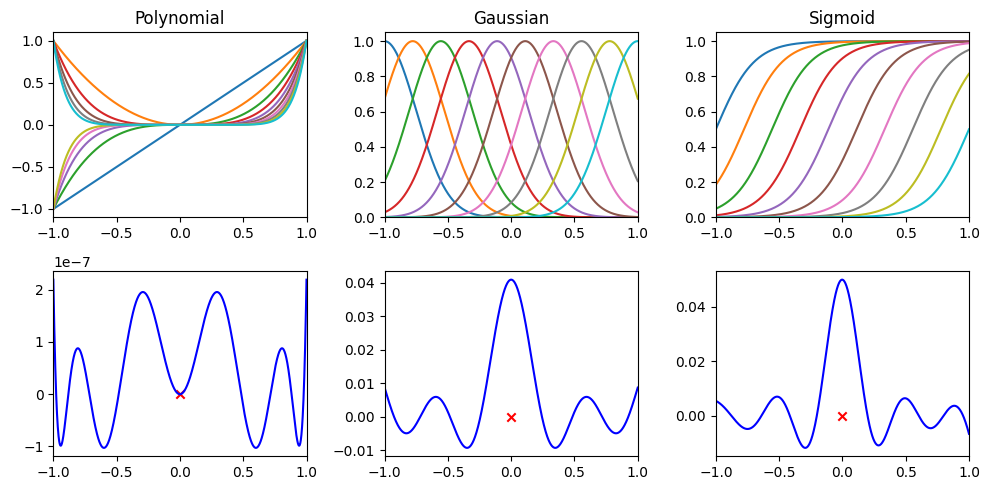

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid and settings
x = np.linspace(-1, 1, 1600)
dx = x[1] - x[0]
xprime = 0.0

M = 10
centers = np.linspace(-1, 1, M)

def gram_inverse_kernel(raw_basis, x, dx, xprime=0.0):
    """
    raw_basis: list of arrays b_i(x) sampled on x-grid
    returns k(x, xprime) using k(x,x') = b(x)^T G^{-1} b(x')
    with G_ij = ∫ b_i(x) b_j(x) dx  (approximated on grid).
    """
    B = np.stack(raw_basis, axis=1)             # shape (N, M)
    G = (B.T @ B) * dx                          # Gram matrix
    Ginv = np.linalg.pinv(G)                    # stable inverse

    b_xprime = np.array([np.interp(xprime, x, bi) for bi in raw_basis])  # (M,)
    k = B @ (Ginv @ b_xprime)                   # (N,)
    return k


# --- Column 1: Polynomials ---
P = 10
raw_poly = [x**i for i in range(1, P+1)]
k_poly = gram_inverse_kernel(raw_poly, x, dx, xprime)

# --- Column 2: Gaussians ---
sigma = 0.25
raw_gauss = [np.exp(-(x-mu)**2/(2*sigma**2)) for mu in centers]
k_gauss = gram_inverse_kernel(raw_gauss, x, dx, xprime)

# --- Column 3: Sigmoids ---
s = 0.15
def sigmoid(z): return 1/(1+np.exp(-z))


raw_sig = [sigmoid((x-mu)/s) for mu in centers]
k_sig = gram_inverse_kernel(raw_sig, x, dx, xprime)

# (Optional) match PRML-ish vertical scale for the bottom row
# (Bishop’s plot is small-amplitude; scaling doesn’t change the shape)
scale = 0.05 / max(np.max(np.abs(k_poly)),
                   np.max(np.abs(k_gauss)), np.max(np.abs(k_sig)))
k_poly *= scale
k_gauss *= scale
k_sig *= scale

# ---- Plot: 2x3 layout ----
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Top row: basis functions
for b in raw_poly:
    axs[0, 0].plot(x, b)
axs[0, 0].set_title("Polynomial")
axs[0, 0].set_xlim(-1, 1)

for b in raw_gauss:
    axs[0, 1].plot(x, b)
axs[0, 1].set_title("Gaussian")
axs[0, 1].set_xlim(-1, 1)
axs[0, 1].set_ylim(0, 1.05)

for b in raw_sig:
    axs[0, 2].plot(x, b)
axs[0, 2].set_title("Sigmoid")
axs[0, 2].set_xlim(-1, 1)
axs[0, 2].set_ylim(0, 1.05)

# Bottom row: kernel k(x, x')
axs[1, 0].plot(x, k_poly, 'b')
axs[1, 0].scatter([xprime], [0], c='r', marker='x')
axs[1, 1].plot(x, k_gauss, 'b')
axs[1, 1].scatter([xprime], [0], c='r', marker='x')
axs[1, 2].plot(x, k_sig,  'b')
axs[1, 2].scatter([xprime], [0], c='r', marker='x')
for j in range(3):
    axs[1, j].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

# "Implicit" Kernels

The main advantage of working with kernel-based methods is the possibility to work with high-dimensional feature spaces but computing the kernel function implicitly, meaning by-passing the dot product in feature space. <br>
Let's consider a 1D infinite polynomial, 
$$
\phi(x) = [1,x^1,x^2,\cdots,x^p]
$$
where $p$ is a large number. 
You can try at home to do the fitting of this large polynomial, we have to invert,
$$
\left (\Phi(\mathbf{X})^\top \Phi(\mathbf{X})+ \lambda I\right ).
$$
$\Phi(\mathbf{X})^\top \Phi(\mathbf{X})$ is a square matrix of the size of the feature space, meaning, the larger the feature space representation the higher the computational cost to fit this style of models. <br>

If we use the kernel trick, the matrix to inverse is, 
$$
\left (\Phi(\mathbf{X})\Phi(\mathbf{X})^\top + \lambda I\right ),
$$
where $\Phi(\mathbf{X})\Phi(\mathbf{X})^\top $ is a square matrix of the size of the data. 

## Gaussian or Radial basis function kernel

To illustrate the advantage of using the kernel function, lets use the Gaussian or RBF kernel. 
The RBF kernel is defined as, 
$$
k_{\text{RBF}}(x,x') = e^{\frac{-(x-x')^2}{2\ell^2}}.
$$
This kernel can be rewritten as, 
$$
k_{\text{RBF}}(x,x') = e^{\frac{-(x)^2}{2\ell^2}}e^{\frac{-(x')^2}{2\ell^2}}\left ( \sum_m^\infty  \frac{1}{m!}\left (\frac{x^\top x'}{\ell^2} \right )^m \right ),
$$
where the terms $e^{\frac{-(x)^2}{2\ell^2}}$ and $e^{\frac{-(x')^2}{2\ell^2}}$ are simple normalization values. The last term depends on the $(x^\top x')^m$. we know that as $m\to \infty$, 
$$
\sum_m^\infty  \frac{1}{m!}\left (\frac{x^\top x'}{\ell^2} \right )^m  \to e^{\frac{x\top x'}{\ell^2}}
$$

An RBF kernel is the same as an infinity polynomial regression model. 


# Common Kernel Functions

1. Linear Kernel
   $$
   k(x, x') = x^T x'
   $$
2. Polynomial Kernel
   $$
   k(x, x') = (x^T x' + c)^p
   $$
3. Radial Basis Function (RBF / Gaussian) Kernel
   $$
   k(x, x') = \exp\left( -\frac{\lVert x - x' \rVert^2}{2\ell^2} \right)
   $$
4. Laplacian Kernel
   $$
   k(x, x') = \exp\left( -\frac{\lVert x - x' \rVert_1}{\ell} \right)
   $$
5. Rational Quadratic Kernel
   $$
   k(x, x') = \left( 1 + \frac{\lVert x - x' \rVert^2}{2\alpha\ell^2} \right)^{-\alpha}
   $$
6. Cosine Similarity Kernel
   $$
   k(x, x') = \frac{x^T x'}{\lVert x \rVert \, \lVert x' \rVert}
   $$
7. Matern Kernel
   $$
   k(x, x') = \frac{2^{1-\nu}}{\Gamma(\nu)}
   \left( \frac{\sqrt{2\nu} \, \lVert x - x' \rVert}{\sigma} \right)^\nu
   K_\nu\left( \frac{\sqrt{2\nu} \, \lVert x - x' \rVert}{\sigma} \right)
   $$
8. Periodic Kernel
   $$
   k(x, x') = \exp\left( -\frac{2\sin^2\left( \pi \lVert x - x' \rVert / p \right)}{\sigma^2} \right)
   $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.metrics.pairwise import pairwise_kernels, cosine_similarity
from sklearn.gaussian_process.kernels import RationalQuadratic, ExpSineSquared, Matern

import ipywidgets as widgets
from IPython.display import display

In [3]:
# Linear kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = x^T x'  (in 1D: k(x, x') = x * x')

# 1D grid for x
x = np.linspace(-3, 3, 800).reshape(-1, 1)

# Widget for x'
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    x_p = np.array([[xprime]])
    k = linear_kernel(x, x_p).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"Linear kernel with $x'={xprime:.2f}$")
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-3, 3)
        plt.grid(alpha=0.3)
        plt.show()


xprime_slider.observe(update_plot, names="value")

display(xprime_slider, out)
update_plot()

FloatSlider(value=0.0, description="x'", max=3.0, min=-3.0, step=0.05)

Output()

In [4]:
# Polynomial kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = (x^T x' + c)^p   (in 1D: (x * x' + c)^p)

# 1D grid for x
x = np.linspace(-3, 3, 800).reshape(-1, 1)

# Widgets
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

degree_slider = widgets.IntSlider(
    value=3, min=1, max=10, step=1,
    description="degree"
)

coef0_slider = widgets.FloatSlider(
    value=1.0, min=-2.0, max=2.0, step=0.05,
    description="c"
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    degree = degree_slider.value
    coef0 = coef0_slider.value
    x_p = np.array([[xprime]])

    k = polynomial_kernel(x, x_p, degree=degree, coef0=coef0).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"Polynomial kernel: $k(x,x')=(x x' + {coef0:.2f})^{degree}$, "
            rf"$x'={xprime:.2f}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-10, 10)
        plt.grid(alpha=0.3)
        plt.show()


# Attach callbacks
xprime_slider.observe(update_plot, names="value")
degree_slider.observe(update_plot, names="value")
coef0_slider.observe(update_plot, names="value")

display(widgets.VBox([xprime_slider, degree_slider, coef0_slider]), out)
update_plot()

Output()

In [5]:
# RBF (Gaussian) kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = exp( -gamma * ||x - x'||^2 )   (in 1D: exp(-gamma (x - x')^2))


# 1D grid for x
x = np.linspace(-3, 3, 800).reshape(-1, 1)

# Widgets
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

gamma_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=2, step=0.05,
    description="gamma"
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    gamma = gamma_slider.value
    x_p = np.array([[xprime]])

    k = rbf_kernel(x, x_p, gamma=gamma).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"RBF kernel: $k(x,x')=\exp(-\gamma (x-x')^2)$, "
            rf"$x'={xprime:.2f}$, $\gamma={gamma:.3g}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-0.05, 1.05)
        plt.grid(alpha=0.3)
        plt.show()


# Attach callbacks
xprime_slider.observe(update_plot, names="value")
gamma_slider.observe(update_plot, names="value")

display(widgets.VBox([xprime_slider, gamma_slider]), out)
update_plot()

Output()

In [6]:
# Laplacian kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = exp( -gamma * ||x - x'||_1 )   (in 1D: exp(-gamma * |x - x'|))

# 1D grid for x
x = np.linspace(-3, 3, 800).reshape(-1, 1)

# Widgets
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

gamma_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=2, step=0.05,
    description="gamma"
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    gamma = gamma_slider.value
    x_p = np.array([[xprime]])

    # Laplacian kernel via sklearn's pairwise_kernels
    k = pairwise_kernels(x, x_p, metric="laplacian", gamma=gamma).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"Laplacian kernel: $k(x,x')=\exp(-\gamma |x-x'|)$, "
            rf"$x'={xprime:.2f}$, $\gamma={gamma:.3g}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-0.05, 1.05)
        plt.grid(alpha=0.3)
        plt.show()


# Attach callbacks
xprime_slider.observe(update_plot, names="value")
gamma_slider.observe(update_plot, names="value")

display(widgets.VBox([xprime_slider, gamma_slider]), out)
update_plot()

Output()

In [7]:
# Cosine similarity kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = (x^T x') / (||x|| ||x'||)


# 1D grid for x (avoid exact zero to keep things well-defined)
x = np.linspace(-3, 3, 800).reshape(-1, 1)
eps = 1e-8
x[np.abs(x) < eps] = eps

# Widgets
xprime_slider = widgets.FloatSlider(
    value=1.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

out = widgets.Output()

def update_plot(change=None):
    xprime = xprime_slider.value
    x_p = np.array([[xprime if abs(xprime) > eps else eps]])

    k = cosine_similarity(x, x_p).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            # $k(x,x')=\frac{x-x'}{|x||x'|}$, "
            rf"Cosine similarity:  $k(x,x')=x-x'/|x||x'|)$, "
            rf"$x'={xprime:.2f}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-1.1, 1.1)
        plt.grid(alpha=0.3)
        plt.show()

# Attach callback
xprime_slider.observe(update_plot, names="value")

display(xprime_slider, out)
update_plot()

FloatSlider(value=1.0, description="x'", max=3.0, min=-3.0, step=0.05)

Output()

In [8]:
# Rational Quadratic kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = ( 1 + ||x - x'||^2 / (2 * alpha * l^2) )^(-alpha)

# 1D grid for x
x = np.linspace(-3, 3, 800).reshape(-1, 1)

# Widgets
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

length_scale_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=2, step=0.05,
    description="ℓ"
)

alpha_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=2, step=0.05,
    description="alpha"
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    l = length_scale_slider.value
    alpha = alpha_slider.value

    x_p = np.array([[xprime]])

    kfun = RationalQuadratic(length_scale=l, alpha=alpha)
    k = kfun(x, x_p).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"RationalQuadratic: $k(x,x')=\left(1+\frac{{(x-x')^2}}{{2\alpha\ell^2}}\right)^{{-\alpha}}$, "
            rf"$x'={xprime:.2f}$, $\ell={l:.3g}$, $\alpha={alpha:.3g}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-0.05, 1.05)
        plt.grid(alpha=0.3)
        plt.show()


# Attach callbacks
xprime_slider.observe(update_plot, names="value")
length_scale_slider.observe(update_plot, names="value")
alpha_slider.observe(update_plot, names="value")

display(widgets.VBox([xprime_slider, length_scale_slider, alpha_slider]), out)
update_plot()

Output()

In [9]:
# ExpSineSquared (Periodic) kernel slice with interactive x' (Jupyter + ipywidgets)
# k(x, x') = exp( - 2 * sin^2(pi * |x - x'| / p) / l^2 )

# 1D grid for x
x = np.linspace(-3, 3, 1200).reshape(-1, 1)

# Widgets
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

length_scale_slider = widgets.FloatLogSlider(
    value=0.6, base=10, min=-2, max=1, step=0.05,
    description="ℓ"
)

periodicity_slider = widgets.FloatSlider(
    value=1.0, min=0.2, max=4.0, step=0.05,
    description="period p",
    continuous_update=True
)

out = widgets.Output()


def update_plot(change=None):
    xprime = xprime_slider.value
    l = length_scale_slider.value
    p = periodicity_slider.value

    x_p = np.array([[xprime]])

    kfun = ExpSineSquared(length_scale=l, periodicity=p)
    k = kfun(x, x_p).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k, linewidth=2)
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"ExpSineSquared (Periodic): $k=\exp\!\left(-\frac{{2\sin^2(\pi|x-x'|/p)}}{{\ell^2}}\right)$, "
            rf"$x'={xprime:.2f}$, $\ell={l:.3g}$, $p={p:.2f}$"
        )
        plt.xlabel("x")
        plt.ylabel(f"k(x, {xprime:.2f})")
        plt.ylim(-0.05, 1.05)
        plt.grid(alpha=0.3)
        plt.show()


# Attach callbacks
xprime_slider.observe(update_plot, names="value")
length_scale_slider.observe(update_plot, names="value")
periodicity_slider.observe(update_plot, names="value")

display(widgets.VBox(
    [xprime_slider, length_scale_slider, periodicity_slider]), out)
update_plot()

Output()

In [10]:
# Matérn kernel slices (nu=0.5, 1.5, 2.5) together, interactive x' and gamma

# 1D grid for x
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Widget: x'
xprime_slider = widgets.FloatSlider(
    value=0.0, min=-3.0, max=3.0, step=0.05,
    description="x'",
    continuous_update=True
)

# Widget: gamma (log scale)
gamma_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=2, step=0.05,
    description="gamma",
    continuous_update=True
)

out = widgets.Output()


def gamma_to_length_scale(gamma):
    # Avoid division by zero
    gamma = max(float(gamma), 1e-12)
    return 1.0 / np.sqrt(2.0 * gamma)


def update_plot(change=None):
    xprime = xprime_slider.value
    gamma = gamma_slider.value
    length_scale = gamma_to_length_scale(gamma)

    x_p = np.array([[xprime]])

    k05 = Matern(length_scale=length_scale, nu=0.5)(x, x_p).ravel()
    k15 = Matern(length_scale=length_scale, nu=1.5)(x, x_p).ravel()
    k25 = Matern(length_scale=length_scale, nu=2.5)(x, x_p).ravel()

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(7, 3.2))
        plt.plot(x.ravel(), k05, linewidth=2, label=r"Matérn $\nu=0.5$")
        plt.plot(x.ravel(), k15, linewidth=2, label=r"Matérn $\nu=1.5$")
        plt.plot(x.ravel(), k25, linewidth=2, label=r"Matérn $\nu=2.5$")
        plt.axvline(xprime, linestyle="--", color="k", alpha=0.6)
        plt.title(
            rf"Matérn slices at $x'={xprime:.2f}$, "
            rf"$\gamma={gamma:.3g}$ (mapped to $\ell={length_scale:.3g}$)"
        )
        plt.xlabel("x")
        plt.ylabel("k(x, x')")
        plt.ylim(-0.05, 1.05)
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()


xprime_slider.observe(update_plot, names="value")
gamma_slider.observe(update_plot, names="value")

display(widgets.VBox([xprime_slider, gamma_slider]), out)
update_plot()

Output()